## Webscraping from GSMaP

***There is absolutely no reason to use this unless you want useless data. Nonetheless I leave this here to look like I did something lol***
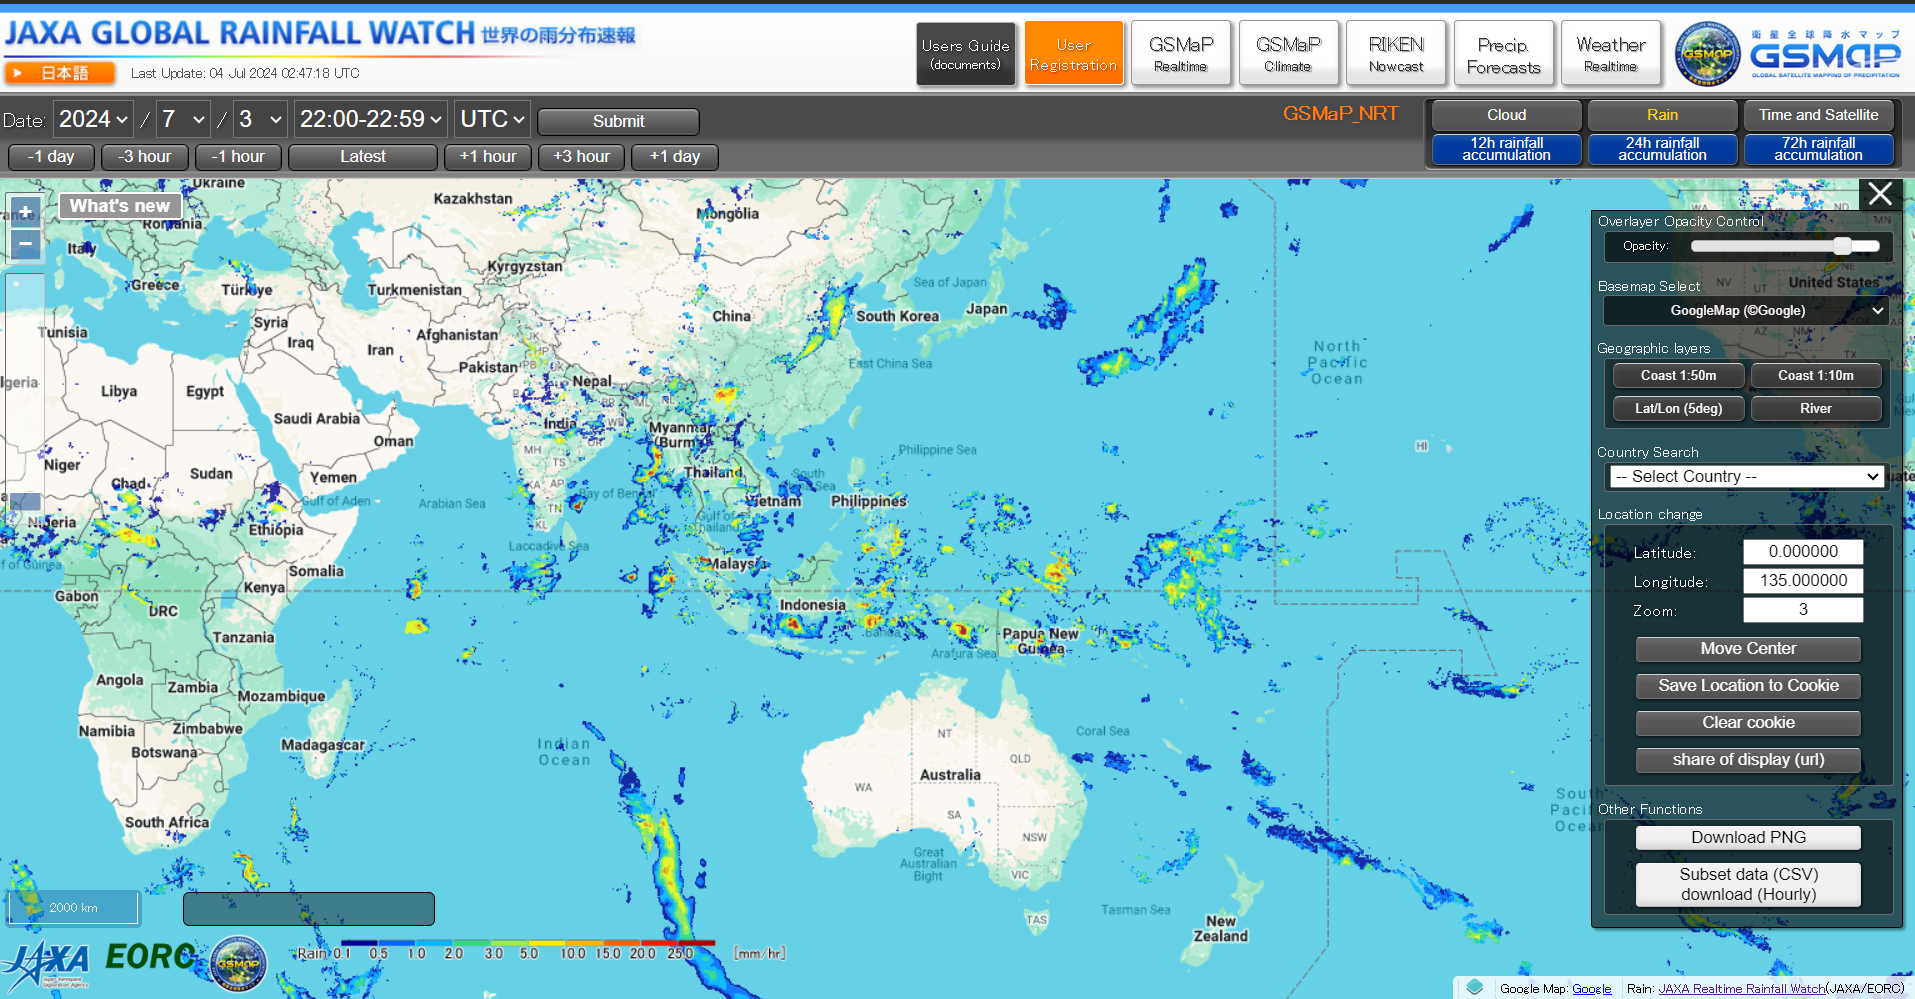

This code block serves as an automatic tool to web scrape aggregate data from GSMaP ie total rainfall in a region of interest. This first block is the D2 region


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from datetime import datetime, timedelta

# Function to initialize the WebDriver
def initialize_driver():
    options = webdriver.ChromeOptions()
    # Add any other options if needed
    driver = webdriver.Chrome(options=options)
    return driver

# Function to automate the data download for a given date range
def download_data_for_date_range(start_date_str, end_date_str):
    driver = initialize_driver()  # Initialize the driver within the function
    try:
        driver.get('https://sharaku.eorc.jaxa.jp/GSMaP/')

        # Wait for the "Subset data (CSV) download (Hourly)" button to be clickable and click it
        subset_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Subset data (CSV) download (Hourly)")]'))
        )
        subset_button.click()

        # Wait for the "Box" button to be clickable and click it
        box_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@name="seltyp" and @value="box"]'))
        )
        box_button.click()
        print("Clicked the 'Box' button successfully.")

       
        north = driver.find_element(By.NAME, "lat0")
        west = driver.find_element(By.NAME, "lon0")
        east = driver.find_element(By.NAME, "lon1")
        south = driver.find_element(By.NAME, "lat1")

         # Fill in the coordinates <-------------------------  (LOOK HERE FOR COORDINATES)
        north.clear()
        north.send_keys("9.97")
        west.clear()
        west.send_keys("93.16")
        east.clear()
        east.send_keys("110.422")
        south.clear()
        south.send_keys("-7.29")
        print("Entered the coordinates successfully.")

        # Fill in the start date and end date and press Enter
        start_date = driver.find_element(By.NAME, "sdate")
        end_date = driver.find_element(By.NAME, "edate")

        start_date.clear()
        time.sleep(1)
        start_date.send_keys(start_date_str + Keys.RETURN)
        time.sleep(1)  # Example start date (YYYY/MM/DD HH:MM) format
        end_date.clear()
        time.sleep(1)
        end_date.send_keys(end_date_str + Keys.RETURN)
        time.sleep(1)  # Example end date (YYYY/MM/DD HH:MM) format
        print(f"Entered the date range: {start_date_str} to {end_date_str}")

        # Click the "Timeseries Graph/Subset data download (Hourly)" button
        timeseries_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@name="shwgrp" and contains(text(), "Timeseries Graph")]'))
        )
        timeseries_button.click()
        print("Clicked the 'Timeseries Graph/Subset data download (Hourly)' button successfully.")

        # Handle the new window that opens
        main_window = driver.current_window_handle
        WebDriverWait(driver, 20).until(EC.number_of_windows_to_be(2))
        new_window = [window for window in driver.window_handles if window != main_window][0]
        driver.switch_to.window(new_window)

        csv_download_link = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.ID, 'graph_dl'))
        )
        csv_download_link.find_element(By.TAG_NAME, "a").click()
        print("Clicked the 'CSV Download' link successfully.")
        
        # Modify the URL to include the login credentials
        csv_url = csv_download_link.find_element(By.TAG_NAME, "a").get_attribute("href")
        csv_url_with_credentials = csv_url.replace("https://", "https://rainmap:Niskur+1404@")
        
        # Navigate to the URL with embedded credentials
        driver.get(csv_url_with_credentials)
        print("Navigated to the CSV download URL with credentials.")
        time.sleep(2)

    except Exception as e:
        print(f"Error: {e}")
    finally:
        driver.quit()

# Main function to run the automation
def automate_subset_data_click():
    start_date = datetime(2003, 1, 1, 0, 0)  #(year, month, day, hour, minute)
    end_date = datetime(2024, 1, 1, 0, 0)
    current_date = start_date

    while current_date < end_date:
        next_date = current_date + timedelta(days=182)  # 6 months interval approximated as 182 days
        start_date_str = current_date.strftime("%Y/%m/%d %H:%M")
        end_date_str = next_date.strftime("%Y/%m/%d %H:%M")
        download_data_for_date_range(start_date_str, end_date_str)
        current_date = next_date

# Run the automation
automate_subset_data_click()


# Use this for just Singapore

need to go through all 5 regions

In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from datetime import datetime, timedelta
from selenium.webdriver.support.ui import Select

# Function to initialize the WebDriver
def initialize_driver():
    options = webdriver.ChromeOptions()
    # Add any other options if needed
    driver = webdriver.Chrome(options=options)
    return driver

# Function to automate the data download for a given date range
def download_data_for_date_range(start_date_str, end_date_str):
    driver = initialize_driver()  # Initialize the driver within the function
    try:
        driver.get('https://sharaku.eorc.jaxa.jp/GSMaP/')

        # Wait for the "Subset data (CSV) download (Hourly)" button to be clickable and click it
        subset_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, '//button[contains(text(), "Subset data (CSV) download (Hourly)")]'))
        )
        subset_button.click()

        bound_button = WebDriverWait(driver, 20).until(
        EC.element_to_be_clickable((By.XPATH, '//button[@name="seltyp" and @value="boundary"]'))
        )
        bound_button.click()
        print("Clicked the 'Boundary' button successfully.")

        # Wait until the select element for 'boundaryA' is present and create a Select object
        select_country = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'boundaryA')))
        select = Select(select_country)
        select.select_by_visible_text('Singapore') # <--- Change this to the desired country

        # Wait until the select element for 'boundaryB' is present and create a Select object
        select_area = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.NAME, 'boundaryB')))
        select_b = Select(select_area)
        time.sleep(1)
        select_b.select_by_value('1') # <---- Change for region {1: Central, 2: East, 3: North, 4: South, 5: West}

        start_date = driver.find_element(By.NAME, "sdate")
        end_date = driver.find_element(By.NAME, "edate")

        start_date.clear()
        time.sleep(1)
        start_date.send_keys(start_date_str + Keys.RETURN)
        time.sleep(1)  # Example start date (YYYY/MM/DD HH:MM) format
        end_date.clear()
        time.sleep(1)
        end_date.send_keys(end_date_str + Keys.RETURN)
        time.sleep(1)  # Example end date (YYYY/MM/DD HH:MM) format
        print(f"Entered the date range: {start_date_str} to {end_date_str}")

        # Click the "Timeseries Graph/Subset data download (Hourly)" button
        timeseries_button = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.XPATH, '//button[@name="shwgrp" and contains(text(), "Timeseries Graph")]'))
        )
        timeseries_button.click()
        print("Clicked the 'Timeseries Graph/Subset data download (Hourly)' button successfully.")

        # Handle the new window that opens
        main_window = driver.current_window_handle
        WebDriverWait(driver, 20).until(EC.number_of_windows_to_be(2))
        new_window = [window for window in driver.window_handles if window != main_window][0]
        driver.switch_to.window(new_window)

        csv_download_link = WebDriverWait(driver, 20).until(
            EC.element_to_be_clickable((By.ID, 'graph_dl'))
        )
        csv_download_link.find_element(By.TAG_NAME, "a").click()
        print("Clicked the 'CSV Download' link successfully.")
        
        # Modify the URL to include the login credentials
        csv_url = csv_download_link.find_element(By.TAG_NAME, "a").get_attribute("href")
        csv_url_with_credentials = csv_url.replace("https://", "https://rainmap:Niskur+1404@")
        
        # Navigate to the URL with embedded credentials
        driver.get(csv_url_with_credentials)
        print("Navigated to the CSV download URL with credentials.")
        time.sleep(2)

    except Exception as e:
        print(f"Error: {e}")
    finally:
        driver.quit()

# Main function to run the automation
def automate_subset_data_click():
    start_date = datetime(2003, 1, 1, 0, 0)  #(year, month, day, hour, minute)
    end_date = datetime(2024, 1, 1, 0, 0)
    current_date = start_date
    while current_date < end_date:
        next_date = current_date + timedelta(days=182)  # 6 months interval approximated as 182 days
        start_date_str = current_date.strftime("%Y/%m/%d %H:%M")
        end_date_str = next_date.strftime("%Y/%m/%d %H:%M")
        download_data_for_date_range(start_date_str, end_date_str)
        current_date = next_date

# Run the automation
automate_subset_data_click()
